In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 14

In this lecture we will:
1. Simulate the Monty Hall Problem
2. Demonstrate Deterministic and Random Sampling
3. Probability Distributions and Empirical Distributions
4. Law of Large Numbers

## Addendum

In [2]:
p1 = 2*(1/100 * 1/99) + 2 * (1/100 * 98/99) + 2 * (98/100 * 1/99)

In [3]:
p2 = 1 - (98/100) * (97/99)

In [4]:
p1 == p2

False

In [5]:
p1, p2

(0.0397979797979798, 0.03979797979797983)

In [6]:
round(p1, 10) == round(p2, 10)

True

---

## The Monty Hall Problem 

Here we simulate the Monty Hall problem.  We break the process into three steps. 

1. Simulate the prize behind the door we picked (this is the only chance event):


In [7]:
prizes = make_array("goat", "goat", "car")

In [8]:
N = 10_000
outcomes = Table().with_column("My Choice", np.random.choice(prizes, N))
outcomes

My Choice
car
goat
goat
goat
car
goat
car
goat
car
goat


2. Then Monty Hall reveals a Goat behind one of the other doors.

In [9]:
outcomes = outcomes.with_column("Monty's Door", "goat")
outcomes

My Choice,Monty's Door
car,goat
goat,goat
goat,goat
goat,goat
car,goat
goat,goat
car,goat
goat,goat
car,goat
goat,goat


3. Finally we compute the prize behind the remaining door.  Since Monty revealed one of the goats, the prize behind the remaining door depends only on our initial choice.  If we picked a car, then the remaining door has a goat.  Otherwise it has a car.

In [10]:
def other_door(my_choice):
    if my_choice == "car":
        return "goat"
    else:
        return "car"

In [11]:
outcomes = outcomes.with_column("Other Door", outcomes.apply(other_door, "My Choice"))
outcomes

My Choice,Monty's Door,Other Door
car,goat,goat
goat,goat,car
goat,goat,car
goat,goat,car
car,goat,goat
goat,goat,car
car,goat,goat
goat,goat,car
car,goat,goat
goat,goat,car


Notice that in the above table each row has two goats and a car.  Each row simulates an outcome of playing the game.

If we stayed with our initial choice how often would we get a car?

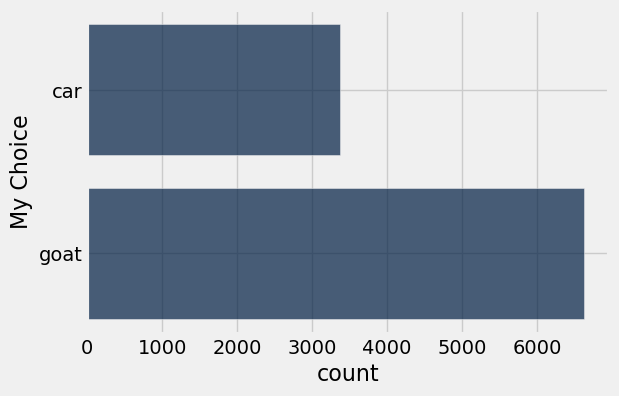

In [12]:
outcomes.group("My Choice").barh("My Choice")

If we switched to the Other door how often would we win?

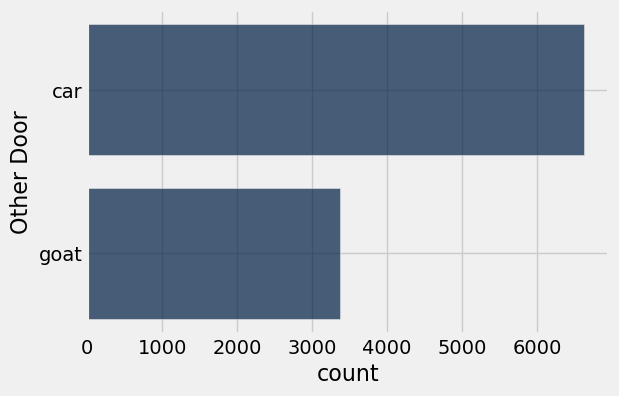

In [13]:
outcomes.group("Other Door").barh("Other Door")

Would you switch?

---
<center> Return to Slides </center>

---

## Random Sampling ##

Here we will use a dataset of all United airlines flights from 6/1/15 to 8/9/15.  This data contains their destination and how long they were delayed, in minutes.

In [14]:
united = Table.read_table('data/united.csv')
united = ( # Adding row numbers so we can see samples more easily
    united
    .with_column('Row', np.arange(united.num_rows))
    .move_to_start('Row') 
)
united

# question-- how late are united flights on average?
# Delay column is in minutes
# 0 minutes = on time!
# negative minutes = early!

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


For each of the following, is this a deterministic or random sampling strategy?

In [16]:
jfk = united.where('Destination', 'JFK')
np.average(jfk.column('Delay'))

# if our population is all united flights, in the summer 2015
# this average flight delay of 18 min is going to be specific to flights that landed in JFK
# think about JFK: it is an international airport, very large, popular destination

18.452736318407961

<details><summary>Answer</summary>

**Deterministic**

</details>

In [19]:
small_sample = united.sample(3, with_replacement=True)
np.average(small_sample.column('Delay'))
# very small teeny tiny sample
# technicallly random, but not a great one since it is so small
small_sample

Row,Date,Flight Number,Destination,Delay
13063,8/26/15,1606,ORD,28
8828,7/29/15,1645,IAD,9
13755,8/31/15,1405,RNO,30


<details><summary>Answer</summary>

**Random**

</details>

In [20]:
(
    united
    .where('Destination', 'JFK')
    .sample(3, with_replacement=True)
)
# we used random selection with .sample function
# but still i'd argue deterministic since we are looking at a subset of JFK flights

# now if our population was now flights into JFK
# this would be a random sample, although a very samll one

Row,Date,Flight Number,Destination,Delay
1978,6/14/15,502,JFK,-8
5847,7/10/15,502,JFK,19
10464,8/9/15,758,JFK,-11


<details><summary>Answer</summary>

**Random**

</details>

---
<center> Return to Slides </center>

---

## Distributions 

In [21]:
die = Table().with_column('Face', np.arange(1, 7)) # np.arange(1, 7) = (1, 2, 3, 4, 5, 6)
die

Face
1
2
3
4
5
6


What is the **Probability Distribution** of drawing each face assuming each face is equally likely (a "fair die")?

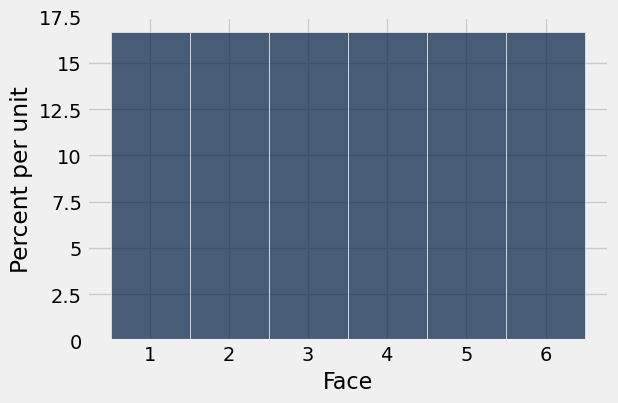

In [22]:
roll_bins = np.arange(0.5, 6.6, 1)
die.hist(bins=roll_bins)

We can sample from the die table many times with replacement:

In [23]:
die.sample(3)

Face
1
3
4


We can construct an **Empirical Distribution** from our simulation:

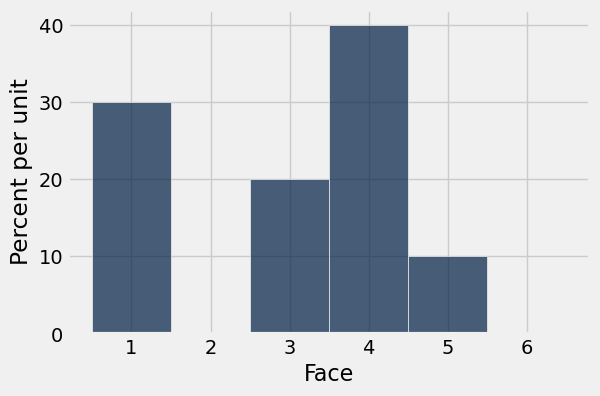

In [24]:
die.sample(10).hist(bins=roll_bins)

If we increase the number of trials in our simulation, what happens to the distribution?

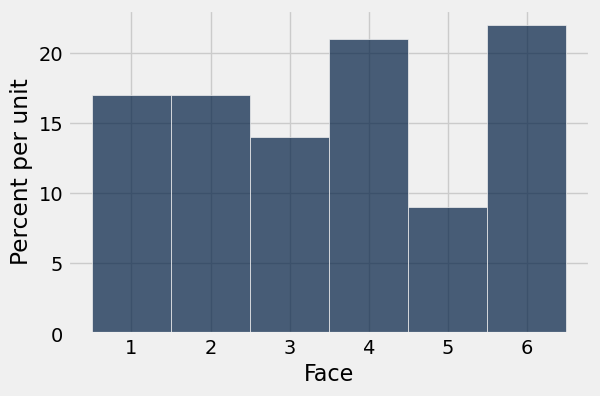

In [25]:
die.sample(100).hist(bins=roll_bins)

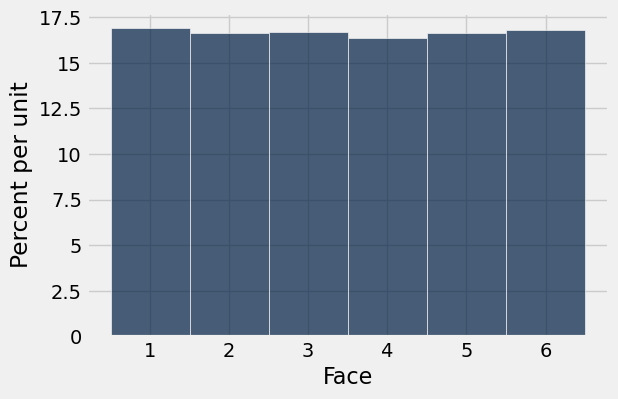

In [26]:
die.sample(100_000).hist(bins=roll_bins)
# this underlines the point, where it is important for our sample to be large and random

---
<center> Return to Slides </center>

---

## Large Random Samples 

The United flight delays is a relatively large dataset:

In [ ]:
# for thurs, review this section 
# write down your questions


united.num_rows

We can plot the distribution of delays for the population:

In [ ]:
united.hist('Delay', bins = 50)

There appears to be some very delayed flights!

In [ ]:
united.sort('Delay', descending=True)

Let's truncate the extreme flights with a histogram from -20 to 201. (More on why we do this later.)

In [ ]:
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins=united_bins)

What happens if we take a small sample from this population of flights and compute the distribution of delays:

In [ ]:
united.sample(10).hist('Delay', bins=united_bins)

If we increase the sample size

In [ ]:
united.sample(1000).hist('Delay', bins=united_bins)

In [ ]:
united.sample(2000).hist('Delay', bins=united_bins)

---
<center> Return to Slides </center>

---

## Simulating Statistics ##

Because we have access to the population (this is rare!) we can compute the parameters directly from the data.  For example, supposed we wanted to know the median flight delay:


In [ ]:
np.median(united.column('Delay'))

In practice, we will often have a sample.  The median of the sample is a statistic that estimates the median of the population.

In [ ]:
np.median(united.sample(10).column('Delay'))

But is it a good estimate?  

It depends on the sample size (and how close we want it to be).  Here we define a function to simulate the process of computing the median from a random sample of a given size:

In [ ]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [ ]:
sample_median(10)

We can then simulate this sampling process many times:

In [ ]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

In [ ]:
medians = Table().with_columns(
    "Sample Medians", sample_medians,
    "Sample Size", 10)
medians.hist("Sample Medians", bins = 50)

In [ ]:
sample_medians2 = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians2 = np.append(sample_medians2, new_median)

In [ ]:
medians.append(Table().with_columns(
    "Sample Medians", sample_medians2,
    "Sample Size", 1000)).hist("Sample Medians", group="Sample Size", bins=50)